In [ ]:
# from google.colab import drive
# drive.mount("./mount")
# import  torch
# import torch.nn
# from torch.utils.data import Dataset

# import pandas
# import matplotlib.pyplot as plt

# df = pandas.read_csv('/content/mount/MyDrive/Colab Notebooks/mnist_data/mnist_train.csv', header=None)
# df.head()

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


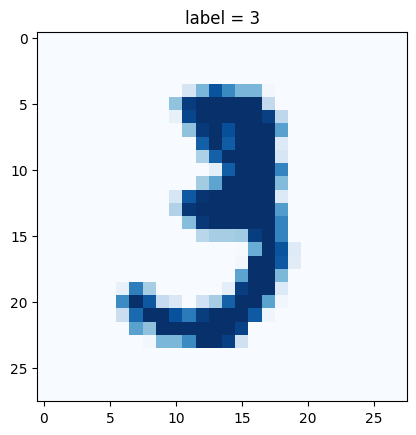

UsageError: Line magic function `%%time` not found.


In [8]:
from google.colab import drive
drive.mount("./mount")
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

csv_file = "/content/mount/MyDrive/Colab Notebooks/mnist_data/mnist_train.csv"


class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # Image target (label)
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0

        # Image data, normalized from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0  # Normalize

        # Return label, image data tensor, and target tensor
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        plt.title("label = " + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        plt.show()  # Add plt.show() to display the image


mnist_dataset = MnistDataset(csv_file)
mnist_dataset.plot_image(10)


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()  # Use MSELoss for regression

        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 1000 == 0:
            print("counter = ", self.counter)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 0.1), figsize=(16.8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        plt.show()  # Add plt.show() to display the plot

%%time

C = Classifier()
epochs = 4

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
      C.train(image_data_tensor, target_tensor)


In [4]:
import torch
import torch.nn as nn

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 10),
        nn.Sigmoid()
    )

    self.loss_function = nn.MSRLoss()

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    pass

  def forward(self, inputs):
    return self.model(inputs)

In [9]:
class Classfier(nn.Module):
  def __init__(self):
    # parent pytorch class
    super().__init__()

    # network layers
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 10),
        nn.Sigmoid()
    )

    self.loss_function = nn.MSRLoss()

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):

    return self.model(inputs)


    # 16

  def train(self, inputs, targets):
    outputs = self.forward(inputs)

    loss = self.loss_function(outputs, targets)

    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass
    if(self.counter % 1000 == 0):
      print("counter = ", self.counter)
      pass
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

    # 17
  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 0.1), figsize = (16.8), alpha = 0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

pass

%%time

C = Classifier()
epochs = 4

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass



UsageError: Line magic function `%%time` not found.


In [8]:
%%time

C = Classifier()
epochs = 4

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass

AttributeError: module 'torch.nn' has no attribute 'MSRLoss'